# IFT 6758 - Assignment 2

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Question 1

### a)
Begin by using the functions created in `q1.py` to make the data more informative and readable. Specifically, complete the following cells:


In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from q1 import count_labels, convert_id, convert_ids, contains_label, get_correlation

sns.set(style="ticks")

In [17]:
# Load the `audio_segments.csv` into a DataFrame `df`

df = pd.read_csv("./data/audio_segments.csv")

In [18]:
# Add a column corresponding to the count of labels called `label_count`
# Here, there is an annoying issue with accessing the positive_labels column

df["label_count"] = df[" positive_labels"].apply(count_labels)

In [34]:
# Add a new column called `label_names` with the processed human readable label names instead of label IDS

# Print the time taken for this operation (either using the time module or timeit). 
# Since we are only executing this code once it is relatively fine that it takes a couple of minutes. 
# However, for a larger dataset, it would be worth the time to speed it up 
# (for example by creating a ID -> name dictionary once and using that).

start_time = time.time()

df["label_names"] = df[" positive_labels"].apply(convert_ids)

end_time = time.time()

total_time = end_time - start_time
print(total_time)

0.0469508171081543


In [27]:
# Display the DataFrame and save it to `audio_segments_clean.csv` (without index)

df.to_csv('audio_segments_clean.csv', index=False)

### b)

Next, using the clean DataFrame, complete the following cells to better understand the distribution of labels in the dataset. For each plot below, make sure to include appropriate **axis names** and a **title**.

Text(0.5, 1.0, 'Distribution of Label Counts')

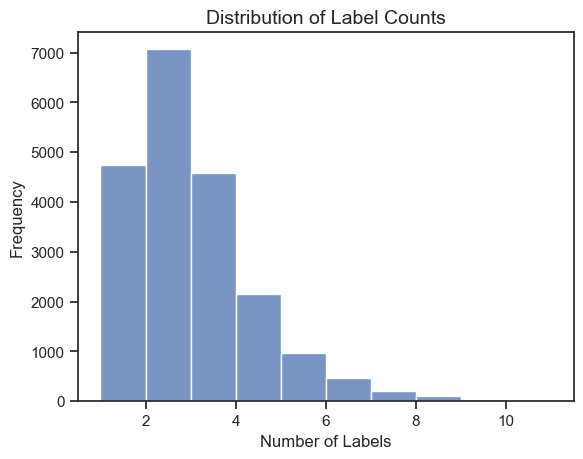

In [32]:
# Using seaborn, create a histogram of the label count of the rows in the DataFrame

sns.histplot(data=df, x="label_count", bins=10)

plt.xlabel('Number of Labels', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Label Counts', fontsize=14)

Follow the steps below to create a heatmap showing "correlation" between different labels. 
- Specifically, each cell of the heatmap should correspond to the probability that a sample with the corresponding row label also has the corresponding column label. 
- Just consider the labels ["Piano", "Classical music", "Speech", "Conversation", "Screaming"]. 

Your final plot should look something like this:

![alt text](images/heatmap.png "Heatmap")

<Axes: >

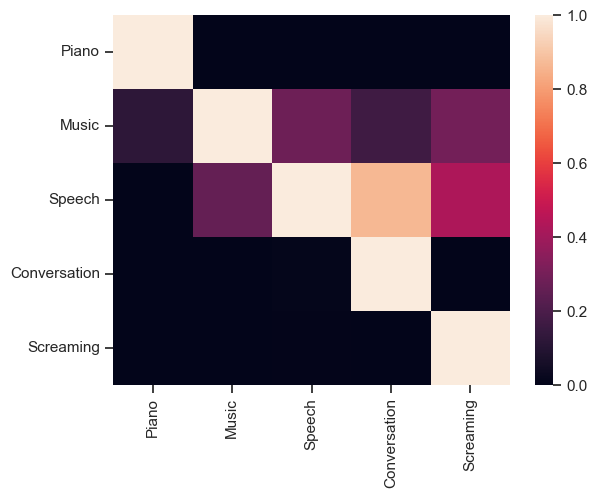

In [50]:
labels = ["Piano", "Music", "Speech", "Conversation", "Screaming"]

# There are a couple ways to approach this, the way we recommend here is to first build a 2D grid where each
# value is the correlation value between the corresponding row/column using the functions created in q1.py.

filtered_df = pd.DataFrame([[get_correlation(df["label_names"], label1, label2) for label1 in labels] for label2 in labels])

# Then using sns.heatmap, create the heatmap, taking advantage of xticklabels and yticklabels to set the label names
# as tick values

sns.heatmap(filtered_df, xticklabels=labels, yticklabels=labels)

## Question 2
Question 2 has no notebook component, just fill out the `q2.py` file.

## Question 3

Download the audio for the following labels using the function created in `q3.py`

In [21]:
from q3 import data_pipeline, rename_files, filter_df

In [22]:
# Download "Cough"

# TODO

# Rename to include the start/end times

# TODO

In [23]:
# Download "Hammer"

# TODO

# Rename to include the start/end times

# TODO

As you've probably noticed, downloading all this audio data is slow (and as such we only required you to download 2 of the labels). In many cases, it is possible to get significant performance increases by using either multiprocessing (https://docs.python.org/3/library/multiprocessing.html) or multithreading (https://docs.python.org/3/library/threading.html) which could for example allow you to download multiple audio files in parallel. 

As a good rule of thumb, use multithreading when your programs is IO-bound (for example here) and multiprocessing when it is CPU-bound (and thus make use of all the cores of your CPU)

## Question 4
For the following cells, use the ID "0GNNFBrRz1E". Complete the functions and run the cells provided below.

In [24]:
import librosa

In [25]:
# Play the audio segment in Jupyter using 
# https://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.Audio

# TODO

One way to visualize audio is through the use of mel-spectrograms. At a very high level, Mel-spectrograms convert audio to a 2D image through the use of the Fourier transform (more details can be found here: https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53)

In [26]:
stft_hopsize = 128
n_fft = 512
sample_rate = 16000

def to_log_scale(mel: np.ndarray) -> np.ndarray:
    mel = np.log(mel + 1e-6)/2.0
    return mel

def create_mel_spectrogram(mp3_path: str) -> np.ndarray:
    """ 
    Using librosa (https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html) write a function
    that:
    1. Loads in audio from a mp3_path (using librosa)
    2. Converts it to a mel-spectrogram (using the parameters provided above)
    3. Applies the logscale transformation to the mel-spectrogram (provided above once again)
    4. Returns the transformed mel-spectrogram
    
    Make sure to pass the correct sample rate
    """

    # TODO  

create_mel_spectrogram("Hammer_cut/0GNNFBrRz1E_40_50_10.mp3")

Audio data can also be visualized by looking at the waveform (i.e. as a line plot of the amplitude values). We will combine both visualizations methods below. The resulting plot should look something like:
![alt text](images/combined_plot.png "Combined Plot")

In [27]:
def plot_audio(mp3_path: str) -> None:
    """ 
    Using matplotlib and create_mel_spectrogram() write a function that takes a mp3_path and plots
    both the waveform (line plot of amplitudes) and the mel-spectrogram side-by-side as subplots.
    
    Use the path as a single main title for both subplots
    """

    # TODO
    

plot_audio("Hammer_cut/0GNNFBrRz1E_40_50_10.mp3")